In [2]:
import spacy
import pandas as pd

In [6]:
df = pd.read_excel('extract.xlsx')

In [9]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
df['text'] = df['Tweet'].apply(nlp)

In [14]:
df['text']

0    (RT, @AlterViggo, :, I, sure, wish, Warren, Bu...
1    (Elon, musk, is, very, cool, !, \n, RT, @Shome...
2    (The, Indian, central, bank, ’s, final, tally,...
Name: text, dtype: object

In [20]:
#for token in df['text'][0]:
    #print(token.text, token.pos_, token.dep_)

In [22]:
#for sent in df['text'][0].sents:
    #print(sent)

In [24]:
len(df['text'][0].vocab)

1184

In [26]:
#for chunk in df['text'][0].noun_chunks:
    #print(chunk.text)

In [56]:
from spacy import displacy

displacy.render(df['text'][0], style='ent', jupyter=True, options={'distance': 110})

In [32]:
import nltk

from nltk.stem.porter import *

In [33]:
p_stemmer = PorterStemmer()

In [36]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [38]:
#show_lemmas(df['text'][0])

In [46]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranavprajapati/nltk_data...


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [48]:
sid.polarity_scores(df.loc[0]['Tweet'])

{'neg': 0.07, 'neu': 0.772, 'pos': 0.158, 'compound': 0.9884}

In [49]:
sid.polarity_scores(df.loc[1]['Tweet'])

{'neg': 0.032, 'neu': 0.86, 'pos': 0.108, 'compound': 0.9729}

In [50]:
sid.polarity_scores(df.loc[2]['Tweet'])

{'neg': 0.057, 'neu': 0.856, 'pos': 0.087, 'compound': 0.9629}

In [52]:
df['scores'] = df['Tweet'].apply(lambda review: sid.polarity_scores(review))

df.head()

,Name,Tweet,text,scores
0,Warren Buffet,RT @AlterViggo: I sure wish Warren Buffet woul...,"(RT, @AlterViggo, :, I, sure, wish, Warren, Bu...","{'neg': 0.07, 'neu': 0.772, 'pos': 0.158, 'com..."
1,Elon Musk,Elon musk is very cool ! \nRT @ShomeAbhik: Con...,"(Elon, musk, is, very, cool, !, \n, RT, @Shome...","{'neg': 0.032, 'neu': 0.86, 'pos': 0.108, 'com..."
2,Demonetization,The Indian central bank’s final tally of Prime...,"(The, Indian, central, bank, ’s, final, tally,...","{'neg': 0.057, 'neu': 0.856, 'pos': 0.087, 'co..."


In [53]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Name,Tweet,text,scores,compound
0,Warren Buffet,RT @AlterViggo: I sure wish Warren Buffet woul...,"(RT, @AlterViggo, :, I, sure, wish, Warren, Bu...","{'neg': 0.07, 'neu': 0.772, 'pos': 0.158, 'com...",0.9884
1,Elon Musk,Elon musk is very cool ! \nRT @ShomeAbhik: Con...,"(Elon, musk, is, very, cool, !, \n, RT, @Shome...","{'neg': 0.032, 'neu': 0.86, 'pos': 0.108, 'com...",0.9729
2,Demonetization,The Indian central bank’s final tally of Prime...,"(The, Indian, central, bank, ’s, final, tally,...","{'neg': 0.057, 'neu': 0.856, 'pos': 0.087, 'co...",0.9629


In [54]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,Name,Tweet,text,scores,compound,comp_score
0,Warren Buffet,RT @AlterViggo: I sure wish Warren Buffet woul...,"(RT, @AlterViggo, :, I, sure, wish, Warren, Bu...","{'neg': 0.07, 'neu': 0.772, 'pos': 0.158, 'com...",0.9884,pos
1,Elon Musk,Elon musk is very cool ! \nRT @ShomeAbhik: Con...,"(Elon, musk, is, very, cool, !, \n, RT, @Shome...","{'neg': 0.032, 'neu': 0.86, 'pos': 0.108, 'com...",0.9729,pos
2,Demonetization,The Indian central bank’s final tally of Prime...,"(The, Indian, central, bank, ’s, final, tally,...","{'neg': 0.057, 'neu': 0.856, 'pos': 0.087, 'co...",0.9629,pos


In [58]:
import scattertext as st
from pprint import pprint


In [81]:
nlp = spacy.load('en')
df.columns
df['Name ']

0     Warren Buffet
1         Elon Musk
2    Demonetization
Name: Name , dtype: object

In [79]:
corpus = st.CorpusFromPandas(df, 
                              category_col='Name ', 
                              text_col='Tweet',
                        
                              nlp=nlp).build()

In [80]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['demonetization', 'ethereum', 'financialization', 'fooli', 'laureat', 'vitalik', 'businessinsider', 'womeninenergy', 'tweeting', 'buterin']


In [93]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
text = df.Tweet[0]
wordcloud = WordCloud().generate(text)

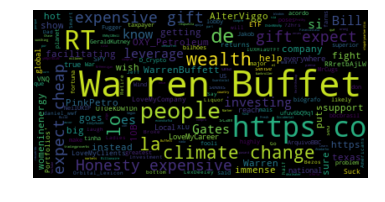

In [94]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

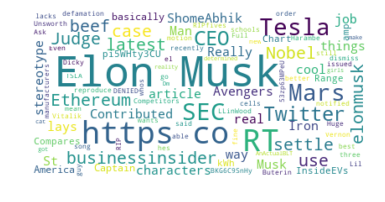

In [95]:
text1 = df.Tweet[1]
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text1)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

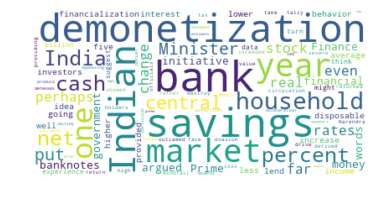

In [97]:
text3 = df.Tweet[2]
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text3)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [98]:
wordcloud.to_file("WB.png")

In [101]:
wordcloud1.to_file("EL.png")

In [102]:
wordcloud2.to_file("DEM.png")